In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK/NFRP_mz100_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,72,0.0927,...,-1,0,0,(),Normal,Unk,Unk,1,Target,179616070
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0280,[2],0,0.334,26,0.0670,...,-1,0,0,(),Normal,Unk,Unk,1,Target,238770302
2,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.1780,[2],0,-0.002,81,0.0840,...,-1,0,0,(),Normal,Unk,Unk,1,Target,236712739
3,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.2940,[2],0,-0.003,20,0.1120,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108607795
4,b1906_293T_proteinID_01A_QE3_122212.01910.01910.4,1,HGGYKPSDEHK/4,0.611,0.5030,[2],0,-0.002,4,0.1970,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108608517


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK/NFRP_mz100_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,AEIHAC[160]K/2,0.143,0.010,[2],0,0.008,17,0.052,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,342045980
1,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.186,0.094,[2],0,-0.002,4,0.094,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,583171149
2,b1906_293T_proteinID_01A_QE3_122212.01911.01911.3,1,AEDSNEQC[160]QVPHEDSSTEPEVK/3,0.080,0.017,[2],0,0.008,5,0.048,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,577871004
3,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PDALIGC[160]ENK/2,0.275,0.049,[2],0,0.494,50,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,496256024
4,b1906_293T_proteinID_01A_QE3_122212.01914.01914.3,1,ILNQPEEVLPK/3,0.349,0.000,[2],0,0.329,53,0.100,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,509946235


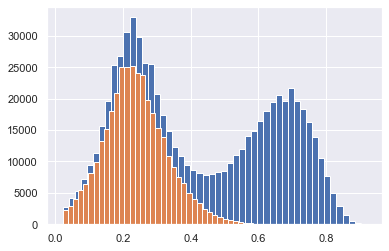

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.018000000000000006
0.01526


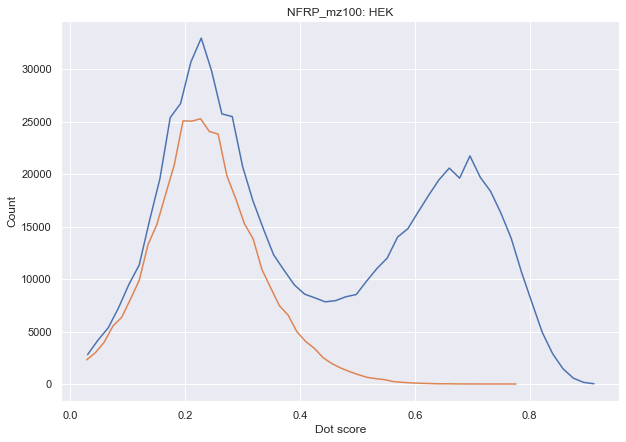

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_mz100: HEK')
plt.plot(nnt1[1][:-1] + 0.009, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0075, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

681029
353046


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.5000000000000003
nnt:  276928
nnd:  2745
FDR:  0.00991232378091056
"""

score:  0.001
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.002
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.003
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.004
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.005
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.006
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.007
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.008
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.009000000000000001
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.010000000000000002
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.011000000000000003
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.012000000000000004
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.013000000000000005
nnt:  681029
nnd:  353046
FDR:  0.518400831682645


score:  0.014000000000000005
nnt:  681029
nnd:  353046
FDR:  0.5184

nnt:  655985
nnd:  328348
FDR:  0.5005419331234708


score:  0.10500000000000008
nnt:  655439
nnd:  327754
FDR:  0.5000526364772313


score:  0.10600000000000008
nnt:  654885
nnd:  327215
FDR:  0.49965261076372186


score:  0.10700000000000008
nnt:  654292
nnd:  326669
FDR:  0.4992709677024937


score:  0.10800000000000008
nnt:  653692
nnd:  326101
FDR:  0.4988603195388654


score:  0.10900000000000008
nnt:  653138
nnd:  325542
FDR:  0.49842759110632057


score:  0.11000000000000008
nnt:  652572
nnd:  324963
FDR:  0.4979726375020687


score:  0.11100000000000008
nnt:  651975
nnd:  324394
FDR:  0.49755588787913646


score:  0.11200000000000009
nnt:  651418
nnd:  323808
FDR:  0.49708175088806267


score:  0.11300000000000009
nnt:  650835
nnd:  323233
FDR:  0.4966435425261395


score:  0.11400000000000009
nnt:  650217
nnd:  322607
FDR:  0.49615282282684087


score:  0.11500000000000009
nnt:  649612
nnd:  322011
FDR:  0.4956974316976903


score:  0.11600000000000009
nnt:  648971
nnd:  3214

nnt:  543373
nnd:  218214
FDR:  0.40159154024951554


score:  0.20700000000000016
nnt:  541727
nnd:  216614
FDR:  0.39985823117548136


score:  0.20800000000000016
nnt:  540059
nnd:  214940
FDR:  0.39799355255629476


score:  0.20900000000000016
nnt:  538302
nnd:  213259
FDR:  0.396169808025978


score:  0.21000000000000016
nnt:  536617
nnd:  211566
FDR:  0.3942588475579417


score:  0.21100000000000016
nnt:  534904
nnd:  209911
FDR:  0.39242742622975335


score:  0.21200000000000016
nnt:  533180
nnd:  208209
FDR:  0.39050414494167074


score:  0.21300000000000016
nnt:  531447
nnd:  206554
FDR:  0.388663403876586


score:  0.21400000000000016
nnt:  529745
nnd:  204889
FDR:  0.38676910589057


score:  0.21500000000000016
nnt:  527988
nnd:  203246
FDR:  0.38494435479594236


score:  0.21600000000000016
nnt:  526315
nnd:  201522
FDR:  0.3828923743385615


score:  0.21700000000000016
nnt:  524605
nnd:  199823
FDR:  0.3809018213703644


score:  0.21800000000000017
nnt:  522762
nnd:  198103


nnt:  389126
nnd:  72488
FDR:  0.18628413418789802


score:  0.3090000000000002
nnt:  388059
nnd:  71495
FDR:  0.1842374484292337


score:  0.3100000000000002
nnt:  387064
nnd:  70557
FDR:  0.18228768369055245


score:  0.3110000000000002
nnt:  385964
nnd:  69577
FDR:  0.18026810790643688


score:  0.3120000000000002
nnt:  384972
nnd:  68681
FDR:  0.17840518271458702


score:  0.3130000000000002
nnt:  383920
nnd:  67756
FDR:  0.1764846843092311


score:  0.3140000000000002
nnt:  382886
nnd:  66848
FDR:  0.1745898256922426


score:  0.3150000000000002
nnt:  381907
nnd:  65972
FDR:  0.17274362606603177


score:  0.3160000000000002
nnt:  380959
nnd:  65049
FDR:  0.17075065820731364


score:  0.3170000000000002
nnt:  379980
nnd:  64187
FDR:  0.16892204852886994


score:  0.3180000000000002
nnt:  379036
nnd:  63346
FDR:  0.16712396711657995


score:  0.31900000000000023
nnt:  378079
nnd:  62480
FDR:  0.16525646756365733


score:  0.32000000000000023
nnt:  377134
nnd:  61633
FDR:  0.16342467

nnt:  317331
nnd:  15152
FDR:  0.04774825024973923


score:  0.4120000000000003
nnt:  316869
nnd:  14902
FDR:  0.04702889837756297


score:  0.4130000000000003
nnt:  316397
nnd:  14645
FDR:  0.046286785272932424


score:  0.4140000000000003
nnt:  315913
nnd:  14390
FDR:  0.04555051549002415


score:  0.4150000000000003
nnt:  315469
nnd:  14139
FDR:  0.04481898379872507


score:  0.4160000000000003
nnt:  315035
nnd:  13908
FDR:  0.044147475677305696


score:  0.4170000000000003
nnt:  314618
nnd:  13657
FDR:  0.04340819660667858


score:  0.4180000000000003
nnt:  314170
nnd:  13410
FDR:  0.04268389725307954


score:  0.4190000000000003
nnt:  313674
nnd:  13175
FDR:  0.042002206112078146


score:  0.4200000000000003
nnt:  313217
nnd:  12964
FDR:  0.04138983516220384


score:  0.4210000000000003
nnt:  312754
nnd:  12766
FDR:  0.04081802311081553


score:  0.4220000000000003
nnt:  312316
nnd:  12539
FDR:  0.04014843940111938


score:  0.4230000000000003
nnt:  311863
nnd:  12306
FDR:  0.0394

'\n결과\n'